In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
df=pd.read_excel("C:/Users/ravin/Downloads/Online Retail Data Set.xlsx")
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Clean The data according to conditions :
1. Create a check that the quantity should not be below 1 unit
2. Create a check that the Unit price should not be below $0

In [5]:
df=df[(df["Quantity"]>=1) & (df["UnitPrice"]>=0)]
df["revenue"]=df["Quantity"]*df["UnitPrice"]
df.to_excel("NewOrderretail.xlsx", index=False, engine='openpyxl')
df

C:\Users\ravin\AppData\Local\Temp\ipykernel_12428\3937569379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["revenue"]=df["Quantity"]*df["UnitPrice"]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


Question 1
The CEO of the retail store is interested to view the time series of the revenue data for the year 2011 only. He would like to view granular data by looking into revenue for each month. The CEO is interested in viewing the seasonal trends and wants to dig deeper into why these trends occur. This analysis will be helpful for the CEO to forecast for the next year.

In [7]:
import datetime
import time
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df_2011=df[df["InvoiceDate"].dt.year==2011]
df_2011

C:\Users\ravin\AppData\Local\Temp\ipykernel_12428\414770103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.50
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.50
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.50
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.50
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.50
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [9]:
df_2011['Month'] = df_2011['InvoiceDate'].dt.month
monthly_revenue = df_2011.groupby('Month')['revenue'].sum().reset_index()
monthly_revenue

C:\Users\ravin\AppData\Local\Temp\ipykernel_12428\4222828162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2011['Month'] = df_2011['InvoiceDate'].dt.month


,Month,revenue
0,1,691364.560
1,2,523631.890
2,3,717639.360
3,4,537808.621
4,5,770536.020
5,6,761739.900
6,7,719221.191
7,8,759138.380
8,9,1058590.172
9,10,1154979.300


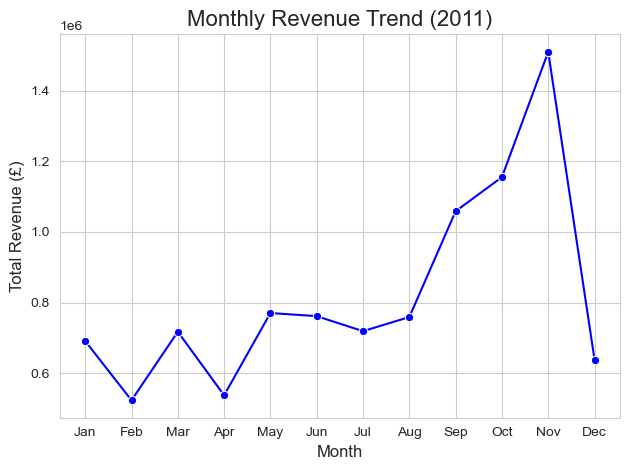

In [11]:
# plot tle chart
sns.set_style("whitegrid")
sns.lineplot(data=monthly_revenue, x='Month', y='revenue', marker='o', color='blue')
plt.title("Monthly Revenue Trend (2011)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue (£)", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.savefig("monthly_revenue_2011.png")
plt.show()

Question 2
The CMO is interested in viewing the top 10 countries which are generating the highest revenue. Additionally, the CMO is also interested in viewing the quantity sold along with the revenue generated. The CMO does not want to have the United Kingdom in this visual.

In [13]:
df_country=df[df["Country"]!="United Kingdom"]
df_country

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.00
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,90.00
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,45.00
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,10.20
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,15.60
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [15]:
country_rev=df_country.groupby("Country").agg({'revenue':'sum','Quantity':'sum'}).reset_index()
top10_countries = country_rev.sort_values(by="revenue", ascending=False).head(10)
top10_countries

,Country,revenue,Quantity
24,Netherlands,285446.34,200937
10,EIRE,283453.96,147447
14,Germany,228867.14,119263
13,France,209715.11,112104
0,Australia,138521.31,84209
31,Spain,61577.11,27951
33,Switzerland,57089.90,30630
3,Belgium,41196.34,23237
32,Sweden,38378.33,36083
20,Japan,37416.37,26016


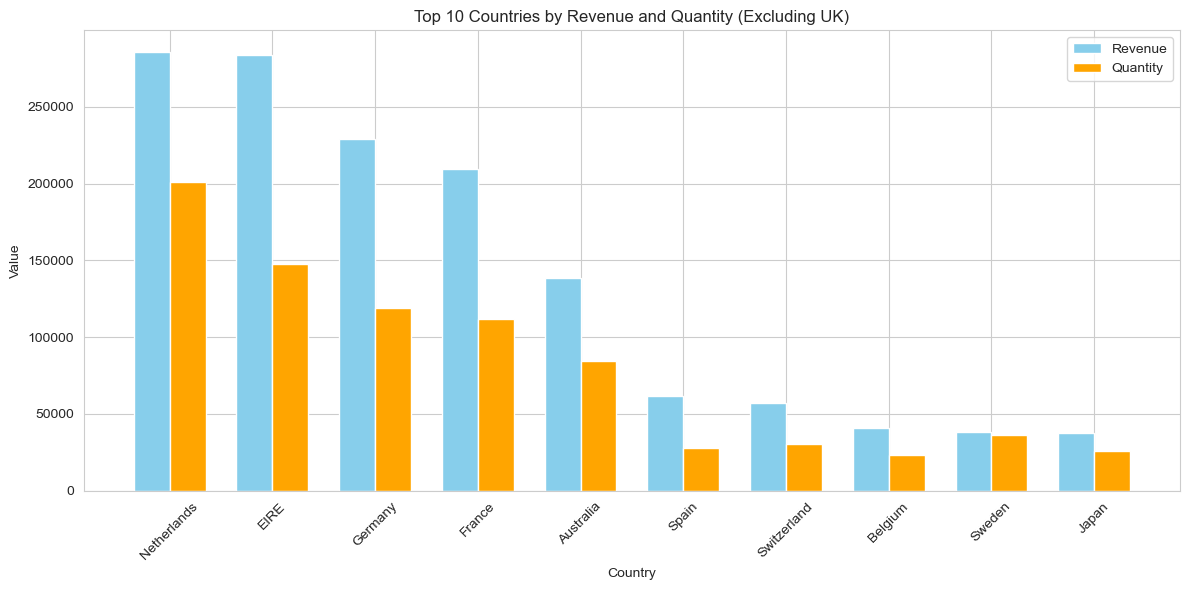

In [17]:
import matplotlib.pyplot as plt
import numpy as np
labels = top10_countries["Country"]
revenue = top10_countries["revenue"]
quantity = top10_countries["Quantity"]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, revenue, width, label='Revenue', color='skyblue')
bars2 = ax.bar(x + width/2, quantity, width, label='Quantity', color='orange')

ax.set_xlabel('Country')
ax.set_ylabel('Value')
ax.set_title('Top 10 Countries by Revenue and Quantity (Excluding UK)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.tight_layout()
plt.savefig("ques2.png")
plt.show()


Ouestion3 : The CMO of the online retail store wants to view the information on the top 10 customers by revenue. He is interested in a visual that shows the greatest revenue generating customer at the start and gradually declines to the lower revenue generating customers. The CMO wants to target the higher revenue generating customers and ensure that they remain satisfied with their products.

In [19]:
df_new = df[df["CustomerID"].notnull()]
customer=df_new.groupby("CustomerID")["revenue"].sum()
top_10_customer=customer.sort_values(ascending=False).head(10)
top_10_customer

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: revenue, dtype: float64

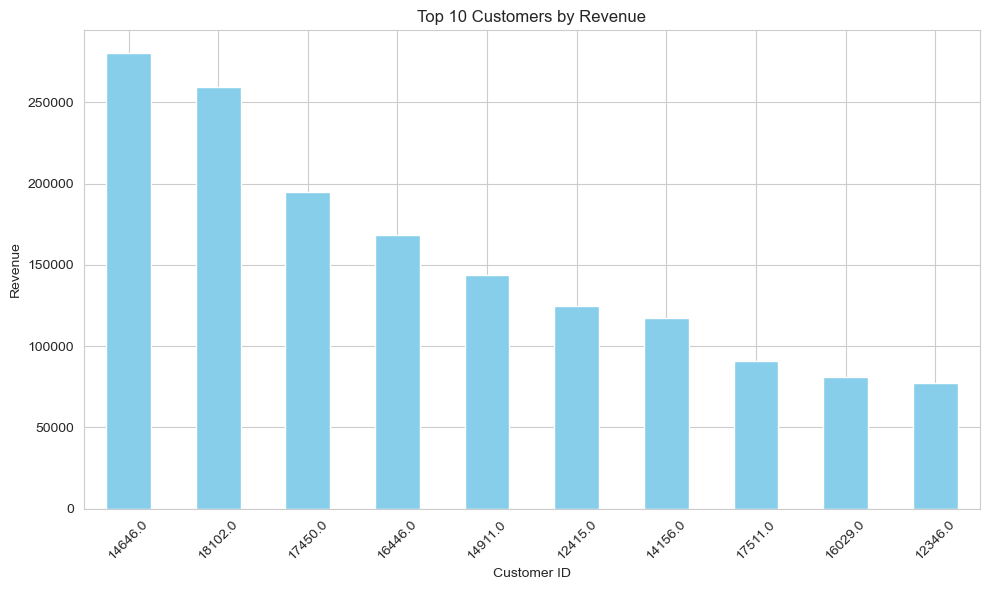

In [21]:
top_10_customer.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Q3.png")
plt.show()

Question 4
The CEO is looking to gain insights on the demand for their products. He wants to look at all countries and see which regions have the greatest demand for their products. Once the CEO gets an idea of the regions that have high demand, he will initiate an expansion strategy which will allow the company to target these areas and generate more business from these regions. He wants to view the entire data on a single view without the need to scroll or hover over the data points to identify the demand. There is no need to show data for the United Kingdom as the CEO is more interested in viewing the countries that have expansion opportunities.

In [23]:
df_country

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.00
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,90.00
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,45.00
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,10.20
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,15.60
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [25]:
demand_country_wise=df_country.groupby("Country")['Quantity'].sum().reset_index()
demand_country_wise

,Country,Quantity
0,Australia,84209
1,Austria,4881
2,Bahrain,314
3,Belgium,23237
4,Brazil,356
5,Canada,2763
6,Channel Islands,9491
7,Cyprus,6361
8,Czech Republic,671
9,Denmark,8235


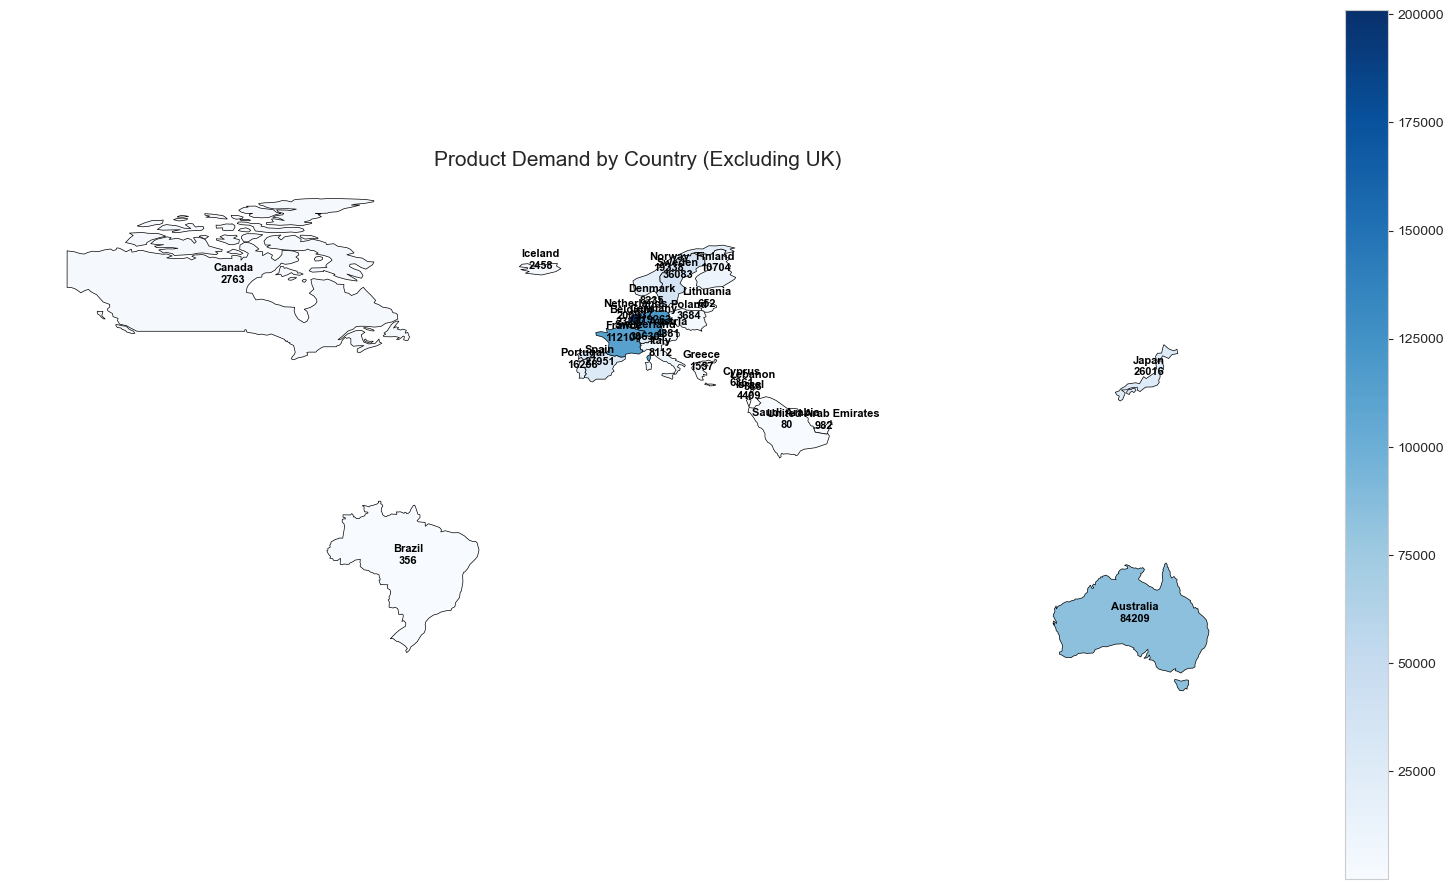

In [59]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

world = gpd.read_file(r"C:\Users\ravin\Downloads\110m_cultural\ne_110m_admin_0_map_units.shp")

world["NAME"] = world["NAME"].str.lower()
demand_country_wise["Country"] = demand_country_wise["Country"].str.lower()

demand_country_wise = demand_country_wise[demand_country_wise["Country"] != "united kingdom"]

merged = world.merge(demand_country_wise, how='left', left_on='NAME', right_on='Country')

fig, ax = plt.subplots(figsize=(16, 9))
merged.plot(column='Quantity', cmap='Blues', legend=True, edgecolor='black', linewidth=0.5, ax=ax)

for idx, row in merged.dropna(subset=['Quantity']).iterrows():
    if row['geometry'].geom_type == 'MultiPolygon':
        point = row['geometry'].centroid
    else:
        point = row['geometry'].centroid
    ax.text(point.x, point.y, f"{row['NAME'].title()}\n{int(row['Quantity'])}", 
            ha='center', fontsize=8, fontweight='bold', color='black')

plt.title("Product Demand by Country (Excluding UK)", fontsize=15)
plt.axis('off')
plt.tight_layout()

plt.savefig("country_demand_map_labeled.png", dpi=300)
plt.show()


